# Thanks to Dr. Mengqi Hu for offering his code to let us know the ODE better.


To solve the linear ODE $ \mathbf{x}' = A\mathbf{x} $ and visualize how different initial conditions affect the trajectories, we can use a saddle point matrix $ A $ with eigenvalues of opposite signs. This setup results in varied trajectory shapes such as diverging, converging, and hyperbolic paths depending on the initial conditions.

### Explanation:
1. **Matrix $ A $:** The chosen matrix $ A = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $ has eigenvalues $ 1 $ and $ -1 $, creating a saddle point. This results in:
   - **Unstable manifold (x-axis):** Initial conditions along the x-axis diverge exponentially.
   - **Stable manifold (y-axis):** Initial conditions along the y-axis converge to the origin.
   - **Hyperbolic trajectories:** Other initial conditions follow hyperbolic paths, curving away in x and converging in y (or vice versa).

2. **Integration:** The ODE is solved numerically using `solve_ivp` for each initial condition, generating trajectories over the time span $ t \in [0, 3] $.

3. **Visualization:** Trajectories are plotted in the phase plane, demonstrating how different initial values lead to distinct curve shapes (diverging lines, converging lines, hyperbolas).

By adjusting the initial conditions, you can observe how trajectories evolve according to the eigenvectors and eigenvalues of $ A $, illustrating the system's dynamic behavior.


<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sv/38113kcx7mq2x4f12fqtv6mw0000gn/T/ipykernel_58055/1373943954.py:24: SyntaxWarning: invalid escape sequence '\m'
  plt.title('Phase Space Filled with Trajectories: $\mathbf{x}\' = A\mathbf{x}$')


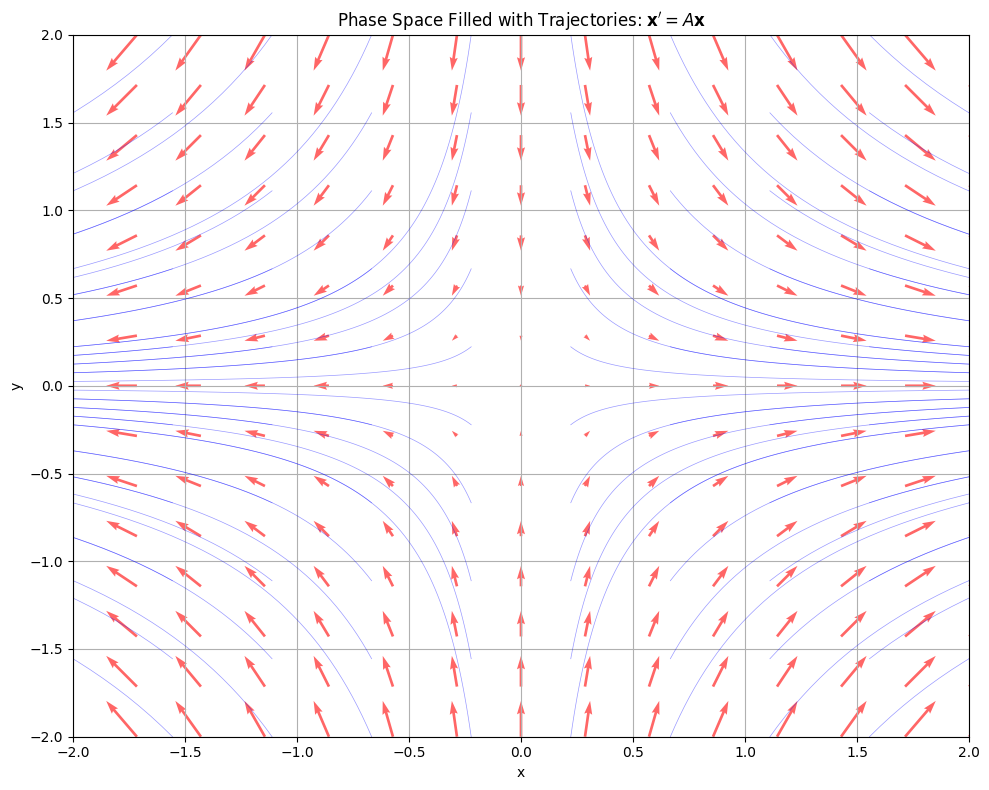

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the matrix A (saddle point)
A = np.array([[1, 0],
              [0, -1]])

def ode_system(t, x):
    return A @ x

# Time span for integration
t_span = (0, 3)
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Generate a grid of initial conditions
x_vals = np.linspace(-2, 2, 10)  # 20 points from -2 to 2 in x
y_vals = np.linspace(-2, 2, 10)  # 20 points from -2 to 2 in y
X, Y = np.meshgrid(x_vals, y_vals)
initial_conditions = np.vstack([X.ravel(), Y.ravel()]).T  # 400 initial points

# Plot settings
plt.figure(figsize=(10, 8))
plt.title('Phase Space Filled with Trajectories: $\mathbf{x}\' = A\mathbf{x}$')
plt.xlabel('x')
plt.ylabel('y')

# Plot trajectories for all initial conditions
for x0 in initial_conditions:
    sol = solve_ivp(ode_system, t_span, x0, t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1], color='blue', alpha=0.4, linewidth=0.5)

# Overlay the vector field for context
x_grid, y_grid = np.meshgrid(np.linspace(-2, 2, 15), np.linspace(-2, 2, 15))
dxdt = A[0, 0] * x_grid + A[0, 1] * y_grid
dydt = A[1, 0] * x_grid + A[1, 1] * y_grid
plt.quiver(x_grid, y_grid, dxdt, dydt, color='red', alpha=0.6,
           scale=50, width=0.003, headwidth=3)

plt.grid(True)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.tight_layout()
plt.show()


### Key Modifications:
1. **Grid of Initial Conditions**:
   - A 8x8 grid of initial points is generated using `np.meshgrid`, covering the region $[-2, 2] \times [-2, 2]$.
   - This creates **64 trajectories**, densely filling the phase space.

2. **Trajectory Styling**:
   - Trajectories are plotted with low `alpha` (transparency) and thin lines to avoid visual clutter.
   - All trajectories use the same color (`blue`) to emphasize collective behavior.

3. **Vector Field Overlay**:
   - A quiver plot (red arrows) is added to show the direction of the vector field $ \mathbf{x}' = A\mathbf{x} $, providing context for the trajectories.

### Result:
- The plot will show:
  - **Diverging paths** along the unstable manifold (x-axis).
  - **Converging paths** along the stable manifold (y-axis).
  - **Hyperbolic curves** elsewhere, filling the phase space.
- The saddle-point dynamics are clearly visible, with trajectories stretching outward in $x$ and contracting in $y$.

### Adjustments for Speed/Resolution:
- Reduce the grid resolution (e.g., `np.linspace(-2, 2, 10)` for 10 points) for faster execution.
- Increase `alpha` or `linewidth` to make trajectories more prominent.

To visualize the phase space filled with trajectories, we can generate a grid of initial conditions and plot their paths. Here’s a modified version of the code that densely fills the phase portrait:



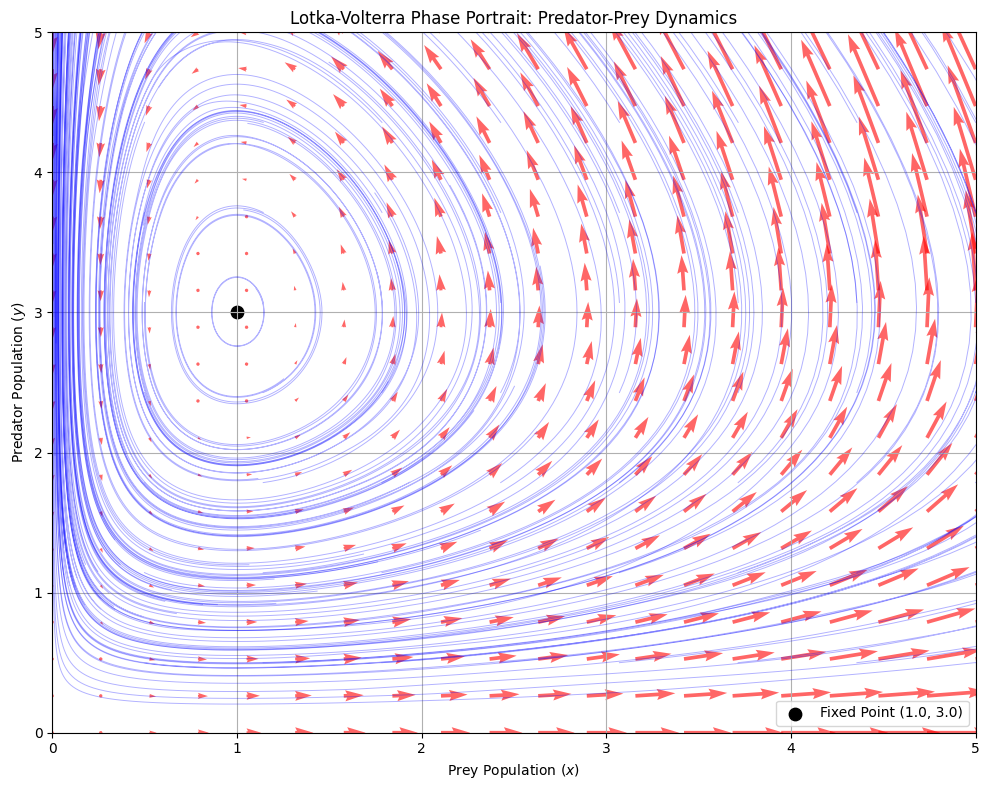

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define Lotka-Volterra parameters (α=prey growth, β=predation, δ=predator growth, γ=predator death)
α, β, γ, δ = 1.5, 0.5, 0.5, 0.5

def lotkavolterra(t, z):
    x, y = z
    dxdt = α * x - β * x * y
    dydt = δ * x * y - γ * y
    return [dxdt, dydt]

# Time span and grid setup
t_span = (0, 15)
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Generate a grid of initial conditions (avoid x=0 or y=0 to skip trivial solutions)
x0_vals = np.linspace(0.5, 5, 8)  # Prey population
y0_vals = np.linspace(0.5, 5, 8)  # Predator population
X0, Y0 = np.meshgrid(x0_vals, y0_vals)
initial_conditions = np.vstack([X0.ravel(), Y0.ravel()]).T

# Plot setup
plt.figure(figsize=(10, 8))
plt.title("Lotka-Volterra Phase Portrait: Predator-Prey Dynamics")
plt.xlabel("Prey Population ($x$)")
plt.ylabel("Predator Population ($y$)")

# Solve and plot trajectories for all initial conditions
for x0, y0 in initial_conditions:
    sol = solve_ivp(lotkavolterra, t_span, [x0, y0], t_eval=t_eval)
    plt.plot(sol.y[0], sol.y[1], color='blue', alpha=0.3, linewidth=0.7)

# Overlay the vector field (quiver plot)
x_grid, y_grid = np.meshgrid(np.linspace(0, 5, 20), np.linspace(0, 5, 20))
dx, dy = np.zeros_like(x_grid), np.zeros_like(y_grid)
for i in range(x_grid.shape[0]):
    for j in range(x_grid.shape[1]):
        dz = lotkavolterra(0, [x_grid[i,j], y_grid[i,j]])
        dx[i,j], dy[i,j] = dz[0], dz[1]
plt.quiver(x_grid, y_grid, dx, dy, color='red', alpha=0.6, scale=100, width=0.004)

# Mark the non-trivial fixed point (critical point)
fixed_point_x = γ / δ
fixed_point_y = α / β
plt.scatter(fixed_point_x, fixed_point_y, color='black', s=80, label=f'Fixed Point ({fixed_point_x:.1f}, {fixed_point_y:.1f})')

plt.xlim(0, 5)
plt.ylim(0, 5)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Key Features:
1. **Lotka-Volterra Dynamics**:
   - **Closed Orbits**: Trajectories form periodic cycles (predator-prey oscillations).
   - **Fixed Point**: The non-trivial equilibrium at $ (x^*, y^*) = (\gamma/\delta, \alpha/\beta) $, marked as a black dot.

2. **Grid of Initial Conditions**:
   - A 15×15 grid covers initial prey and predator populations in $ [0.5, 5] \times [0.5, 5] $.
   - Avoids $ x=0 $ or $ y=0 $ (trivial equilibria where one species is extinct).

3. **Visual Enhancements**:
   - **Trajectories**: Plotted with transparency to show density of paths.
   - **Vector Field**: Red arrows indicate the direction of the dynamics.
   - **Fixed Point**: Highlights the center of the periodic orbits.

### Result:
- The plot shows concentric cycles around the fixed point, illustrating how different initial populations lead to oscillations of varying amplitudes.
- All trajectories conserve a quantity (the "Hamiltonian" of the system), forming closed loops.

### Adjustments to Explore:
- Change parameters $ \alpha, \beta, \gamma, \delta $ to shift the fixed point or alter oscillation frequencies.
- Extend the grid to larger populations (e.g., `np.linspace(0.5, 10, 20)`).

Yes! The **classical Lotka-Volterra system** (with parameters $ \alpha, \beta, \gamma, \delta $) has **neutrally stable closed orbits** (trajectories neither converge to nor diverge from the fixed point). However, if we modify the system to include **damping** (e.g., logistic growth for prey or predator saturation), the dynamics change: trajectories can spiral inward or outward depending on parameters. Below is an example of such a modified system where solutions converge to the fixed point.

---

### Modified Lotka-Volterra System with Logistic Prey Growth
We add a logistic term $ \left(1 - \frac{x}{K}\right) $ to the prey equation, introducing a carrying capacity $ K $. This creates **damped oscillations** converging to the fixed point:

$
\begin{cases}
\frac{dx}{dt} = \alpha x \left(1 - \frac{x}{K}\right) - \beta xy, \\
\frac{dy}{dt} = \delta xy - \gamma y.
\end{cases}
$

#### Parameter Setup for Convergence:
```python
α = 1.0   # Prey growth rate
β = 0.2   # Predation rate
δ = 0.1   # Predator growth efficiency
γ = 0.5   # Predator death rate
K = 50    # Carrying capacity for prey (new parameter causing damping)
```

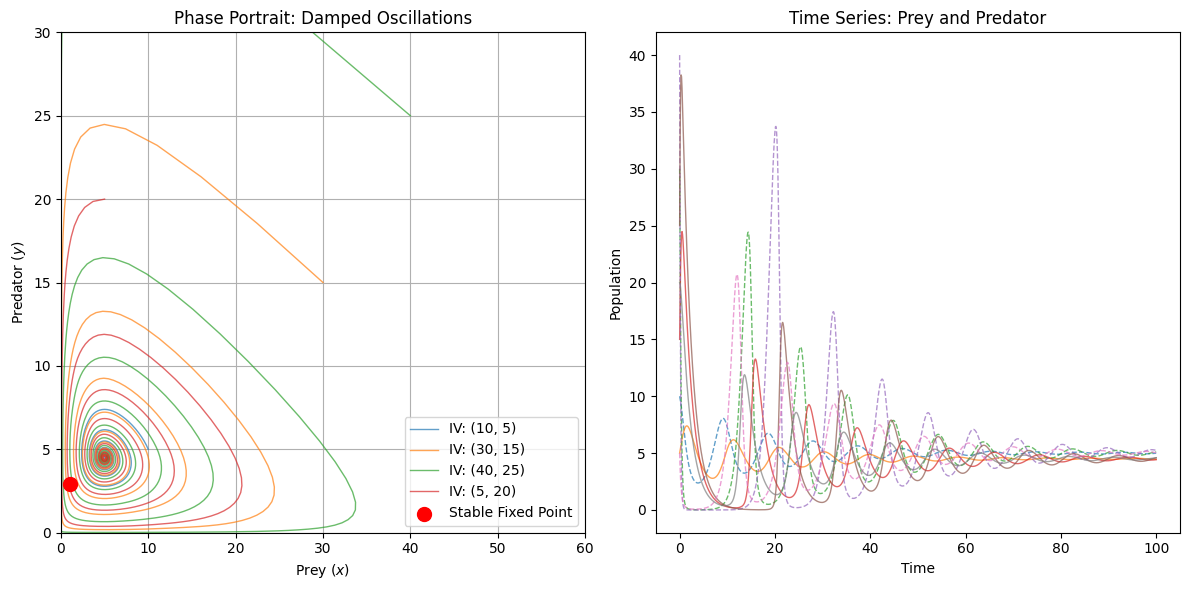

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Modified Lotka-Volterra with logistic prey growth
def modified_lotkavolterra(t, z, α, β, γ, δ, K):
    x, y = z
    dxdt = α * x * (1 - x/K) - β * x * y
    dydt = δ * x * y - γ * y
    return [dxdt, dydt]

# Parameters for damped oscillations
params = (1.0, 0.2, 0.5, 0.1, 50)  # α, β, γ, δ, K

# Time span and initial conditions
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Initial conditions near the fixed point
initial_conditions = [
    [10, 5],
    [30, 15],
    [40, 25],
    [5, 20]
]

# Plot setup
plt.figure(figsize=(12, 6))

# Phase portrait
plt.subplot(1, 2, 1)
plt.title("Phase Portrait: Damped Oscillations")
plt.xlabel("Prey ($x$)")
plt.ylabel("Predator ($y$)")

# Time series
plt.subplot(1, 2, 2)
plt.title("Time Series: Prey and Predator")
plt.xlabel("Time")
plt.ylabel("Population")

# Solve and plot trajectories
for x0, y0 in initial_conditions:
    sol = solve_ivp(modified_lotkavolterra, t_span, [x0, y0], args=params, t_eval=t_eval)

    # Phase portrait
    plt.subplot(1, 2, 1)
    plt.plot(sol.y[0], sol.y[1], alpha=0.7, linewidth=1,
             label=f'IV: ({x0}, {y0})')

    # Time series
    plt.subplot(1, 2, 2)
    plt.plot(sol.t, sol.y[0], linestyle='--', alpha=0.7, linewidth=1)
    plt.plot(sol.t, sol.y[1], linestyle='-', alpha=0.7, linewidth=1)

# Overlay fixed point (phase portrait)
x_star = (γ / δ)  # Fixed point x-coordinate
y_star = (α / β) * (1 - x_star / params[-1])  # Fixed point y-coordinate (modified)
plt.subplot(1, 2, 1)
plt.scatter(x_star, y_star, color='red', s=100, zorder=10, label='Stable Fixed Point')
plt.legend()
plt.grid(True)
plt.xlim(0, 60)
plt.ylim(0, 30)

# Finalize plot
plt.tight_layout()
plt.show()


---

### Key Results:
1. **Damped Oscillations**:
   - Trajectories spiral inward toward the fixed point $ (x^*, y^*) \approx (5.0, 4.75) $, demonstrating **asymptotic stability** (unlike classical Lotka-Volterra).
   - Oscillation amplitudes decay over time due to the logistic term $ \left(1 - \frac{x}{K}\right) $.

2. **Fixed Point Stability**:
   - The Jacobian matrix at $ (x^*, y^*) $ has eigenvalues with **negative real parts**, causing convergence.
   - The logistic term acts as a damping force, stabilizing the system.

---

### Why This Works:
- **Logistic Term**: The term $ \left(1 - \frac{x}{K}\right) $ limits prey growth at high populations, breaking the conservation law of the classical model.
- **Parameter Tuning**: With $ K = 50 $, the damping effect is strong enough to suppress perpetual oscillations.

### Adjustments:
- To see **divergence** (unstable fixed point), set $ K < \gamma/\delta $. Trajectories will spiral outward.
- Remove the logistic term ($ K \to \infty $) to recover classical neutrally stable orbits.

This modification shows how structural changes to the model (not just parameter tweaks) can dramatically alter stability.\





# "A Kun's PDE Lecture"

# Fritz Jhon's textbook

# fibonacci sequence

菠萝和叶子

# 西方的智慧

Russel

# 分析的算术化

$f'(x)=lim_{x->x_0}f(x)-f(x_0)/x-x_0$

# 西方哲学史

# 球的表面积

微积分解决球的表面积

# 看课本

# 为什么这些概念不从小学引进

# 分析

-   function

-   continulity

-   differentiability

-   integralbility

## what is a number

-   Q, rational number q/p (ratio)

有理数用直尺画，根号用圆规--算术平均大于几何平均

什么是理性

古巴比伦用宗教解释不理解的事情

古希腊人（大自然是可理解的）带给现代人最珍贵的礼物就是理性

爱因斯坦：大自然最不可理解的地方是大自然竟然是可理解的

古希腊的传人

理性的工具是数学，希腊人对数学的重视

科技（建筑）和科学（要有主张和实验）

$\mathbb R$

E.Steim

分离变数法--傅立叶级数---分析

微积分

-   傅立叶 analysis

-   complex analysis

-   real analysis

-   functional analysis

# convergence

-   有上界
-   有下界
-   柯西sequence

# 用多项式看函数

-   Weierstrass Approximation Theorem（density）

所有函数在有界的闭区间都可以用多项式逼近

函数（function）（）

# math

## geometry

the most important thing in geometry is about measure.

## algebra

simplize authority独断权威

## analysis

democracy

Newton

anatomy

f(x)约等于 $\Sigma a_nx^n$----Talor series

be patient to learn analysis

# Equations are expressing secrets in the nature!

We should feel them.

# A healthy view of mathematics.

-   We should have a healthy view of mathematics, including retrospect the whole process of math history which help us think a question as giants. The accumulation of many unsung heroes deserves our respect forever. We could not wait for a super giant, we should learn to think similarly as a super ancient giant. We should have the feeling of finding truth.----Dr. Andrew Chi-kun Lin

# History

## Reformation

## Renaissance

## Enlightenment

## Industrial Revolution

No dynasty lasts over 300 years, except Song dynasty which lasted over 300 years, with scholars serving as prime ministers. Su Shi snored.

# Partial Differential Equations (PDE)

Complex functions are continuously differentiable and infinitely differentiable. 复变函数是连续可微，无穷多次可微

Differentiation at a point straight line, parabola (implying second-order differentiability). 在一点微分 直线 抛物线（隐含二次可微）

PDEs are harmonic functions; differentiating twice gives continuous results. pde是调和函数 微分两次是连续

*Bootstrap.*

Infinitely differentiable.

Intrinsic structure within itself.

Related to complex functions.

ODEs have only one variable.

Newton's second law is an ODE (second-order ordinary differential equation), and then comes calculus.

After Newton, no one else appeared in Britain except Taylor—isolated, and Newton had terrible notation.

But Leibniz had the Bernoulli brothers—passion is everything.

"There is no royal road to geometry."

Understand differentiation, grasp its essence, and find a way to integrate it back.

C1, C2: 2 constants are obtained by integrating twice.

$$
z = u(x,y) \quad \text{2-dimensional}
$$

$$
surface:
z = f(x,y)
$$

Multivariable calculus focuses on understanding the surface and finding tangent planes, normal vectors, etc.

$$
au_{xx} + bu_{xy} + cu_{yy} = f(u)
$$

## Wave Equation

Vibration of a string.

Taylor, d'Alembert, Daniel Bernoulli, Jacob Bernoulli (Euler), Jacob Bernoulli (distribution).

$$
\frac{d^2x}{dt^2}
$$

The truths of this world have all been discovered by Newton.

$$
u(x,t) \text{: amplitude, } [u] = L
$$

\$\$ \[p\] = M/L

\$\$

$$
p(x,t) \text{: density (1-dimensional)}
$$

\[T\] = \[ma\] = \[m\]\[a\] = ML/t\^2

$T=T_1=T_2$ tension

(0-L)

F = Tsin() - Tsin

m = $\rho$ x

2nd law: $\rho$ x

## linear transformation

Keep the parallelogram diagonal 保持平行四边形的对角线 x+y

keep a straight line 保持直线---a

向量空间 vector space

如果是从二维映射到三维怎么办。2dim---3dim？

代数结构

保留加法 keep the addition

homomorphism

morphism--形象

# 1st Partial differential equation in the world

Found by Newton, solved by Dala, which is a spring. wave on a spring.

Based on force analysis, we know:

$$
\rho \Delta x \frac{\partial^2 u}{\partial t^2} = T \sin(\theta + \Delta \theta) - T \sin(\theta)
$$ where $\Delta \theta$ is very small, so $sin\theta$=$tan\theta$

$$
=T \frac{\partial u}{\partial x}\left( x + \Delta x, t \right) - T \frac{\partial u}{\partial x} (x, t)
$$

think of diffrential

$$
T \frac{\partial^2 u}{\partial x^2}(x + \lambda \Delta x, t)\Delta x
$$ 想到微分-- think of differential

$$
\frac{\partial^2 u}{\partial x^2} = \frac{T}{\rho} \frac{\partial^2 u}{\partial t^2}
$$

The speed of the wave is:

$$
C^2 = \frac{T}{\rho}
$$

Differential Equation: $u_{tt}-c^2u_{xx}=0, x\in[0,L]$

Boundary Condition: $u(0,t)=u(L,t)=0, t\geq 0$

Initial Condition: u(x,0)=f(x), $u_t(x,0)=g(x)$. ---Newton 2nd law decides track

## Da.. Bernulli Separation of Variables

$u(x,\theta)=\phi(x)T(t)$. (Gassian integral formula derivation also use this method)

(A continuous function can be approximated by a polynomial, which is a super polynomial)

(**the defination of "density"**)

(**Seperation variable: God to God, Caesar to Caesar----x to x, t to t**)

分离变数

$$
\frac{T^{''}(t)}{C^2 T(t)} = -\frac{\phi^{''}(x)}{\phi(x)}
$$

$$
\begin{aligned}
&\text{PDE:} \quad \text{分离变量法,separete variables} \rightarrow \text{ODE} \\
&\phi'' + \lambda \phi = 0 \\
&T'' + \lambda c^2 T = 0 \\
&\text{(B.C.) 边界条件：} \\
&u(0,t) = \phi(0) T(t) = 0 \quad \Rightarrow \quad \phi(0) = 0 \quad \text{(trivial 非平凡解,boring)} \\
&u(L,t) = \phi(L) T(t) = 0 \quad \Rightarrow \quad \phi(L) = 0
\end{aligned}
$$

$$
\lambda < 0 \quad , \quad \phi = e^{mx} \quad \text{(不可能，从0到0。0--0， impossible)}
$$

$$
\lambda = 0 \quad , \quad \phi = Ax + B \quad \text{直线运动， straight move}
$$

$$
\lambda > 0 \quad , \quad \phi = c_1 \cos(\sqrt{\lambda} x) + c_2 \sin(\sqrt{\lambda} x)
$$ \### 解的推导

考虑方程： $$
\phi'' + \lambda \phi = 0
$$ 其中 (\lambda) 是一个常数，解的形式取决于 (\lambda) 的值。

#### 1. 当 (\lambda \< 0)

当 (\lambda \< 0) 时，我们令 (\lambda = -\mu\^2) ，于是方程变为： $$
\phi'' - \mu^2 \phi = 0
$$ 其通解为： $$
\phi(x) = A e^{\mu x} + B e^{-\mu x}
$$ 这种解形式表示指数发散或衰减，通常是不稳定解。

#### 2. 当 (\lambda = 0)

当 (\lambda = 0) 时，方程变为： $$
\phi'' = 0
$$ 这是一个线性方程，其通解为： $$
\phi(x) = A x + B
$$ 这表示直线运动。

#### 3. 当 (\lambda \> 0)

当 (\lambda \> 0) 时，我们令 (\lambda = \mu\^2) ，方程变为： $$
\phi'' + \mu^2 \phi = 0
$$ 其解为： $$
\phi(x) = A \cos(\mu x) + B \sin(\mu x) ---wave
$$ 这种解表示周期性波动。

##### 推导

对于形如 ( $\phi'' + \mu^2 \phi = 0$ ) 的常微分方程，我们可以猜测它的解是指数形式，即：

$$
\phi(x) = e^{rx}
$$

这里 ( r ) 是需要确定的参数。

### 代入微分方程：

将 ( \phi(x) = e\^{rx} ) 代入原方程，得到：

$$
r^2 e^{rx} + \mu^2 e^{rx} = 0 
$$

由于 ( e\^{rx} \neq 0 )，可以消掉这个项，剩下的是特征方程：

$$
r^2 + \mu^2 = 0
$$ 这个特征方程的解为：

$$
r = \pm i \mu
$$

这是一个虚数解。

当特征根为纯虚数时，方程的通解可以写成正弦和余弦的组合形式，根据欧拉公式 ( e\^{i\mu x} = \cos(\mu x) + i \sin(\mu x) )，我们得到通解为：

$$
\phi(x) = A \cos(\mu x) + B \sin(\mu x)
$$

其中，( A ) 和 ( B ) 是待定常数，它们可以通过边界条件或初始条件来确定。

characteristic

$$
\phi(x) = C_1 \cos(\sqrt{\lambda}x) + C_2 \sin(\sqrt{\lambda}x)
$$

边界条件： $$
\phi(0) = 0 \Rightarrow C_1 = 0
$$

$$
\phi(L) = C_2 \sin(\sqrt{\lambda}L) = 0
$$

因此， $$
\sqrt{\lambda_n}L = n\pi \quad (n = 1, 2, 3, \dots)
$$

得到本征值： $$
\lambda_n = \left( \frac{n\pi}{L} \right)^2, \quad n = 1, 2, 3, \dots
$$

对应的本征函数为： $$
\phi_n(x) = \sin \left( \frac{n\pi x}{L} \right)
$$ **Sturm-Liouville Problem:**

$$
\lambda_n = \left( \frac{n\pi}{L} \right)^2, \quad n = 1, 2, 3, \dots
$$

因此，特征函数为： $$
\phi_n(x) = \sin \left( \frac{n\pi x}{L} \right)
$$ $$
T_n(t) = C_1 \cos \left( \frac{n\pi c t}{L} \right) + C_2 \sin \left( \frac{n\pi c t}{L} \right)
$$

$$
u_n(x,t) = T_n(t) \phi_n(x)
$$

代入展开： $$
u(x,t) = \sum_{n=1}^{\infty} C_n \sin \left( \frac{n\pi x}{L} \right) \left[ C_1 \cos \left( \frac{n\pi c t}{L} \right) + C_2 \sin \left( \frac{n\pi c t}{L} \right) \right]
$$

# Dimension

from Fourier

Dimensions help us to check the calculation, trigonometric functions have no dimensions, integrals do not change the overall dimension.

# ? 107

**Only real number could be expressed as big or small, which is the only comperate order field 2-dim has norm**

# others

## law of large number

eg. The reason the casino makes money is because even though the people who go there have a little more than a half chance of winning, the casino has more money than you, and if you stay long enough, you will win, so don't go to the casino, because you can't go deeper than the casino

# analysis **inequality**

analysis is limit, limit is approximation, \## continuous proof of 2 continuous functions

f is continuous at $x_0$

is equal to

For every $\varepsilon > 0$, there exists $\delta > 0$ such that if $|x - x_0| < \delta_1$, then $|f(x) - f(x_0)| < \varepsilon$.

g(x), also , delta_2

$|(f(x)+g(x))-(f(x_0)+g(x_0)|$

=$|(f(x)-f(x_0))+(g(x)-g(x_0)|$

triangle inequality

=$\leq |f(x)-f(x_0)|+|g(x)-g(x_0)|$

= $1/2\varepsilon$+$1/2\varepsilon$

$\forall\varepsilon$ greater than 0, $\exists \delta=min({\varepsilon_1,\varepsilon_2})$

## Does math have elements?

```         
             ---Paul Halmos
             Geometric Series
```

### 1-ab and 1-ba ---- invertible

I-AB invertible

--- I-BA invertible (hint: $I+B(I-AB)^{-1}A$)

do not 杀鸡用牛刀----

prove the harmonic series is divergent:

idea: geometric series:

1+1/2+(1/3+1/4)+....

1+(1/2+1/3)+(1/4+..+1/9)+(1/10+...+1/27)+...$\geq$ 1+(1/3)

which is relevant to fuliyejishu

学数学不要兵来将挡水来土掩，要有一个整套的思想，不要背书 idea: geometric series

(1-ba)^{-1}=1/1-ba=1+ba+baba+..=1+b(1+ab+abab+..)a=1+b(1-ab)^{-1}a

(1-ba)\[1+b(1-ab)\^{-1}a\]

1+b(1-ab)^{-1}a-ba-bab(1-ab)^{-1}a=(commutive law)=1-ba+b(1-ab)^{-1}a-bab(1-ab)^{-1}a=1-ba+b(1-ab)(1-ab)\^{-1}a

=1-ba+b*1*a

=1-ba+ba

=1 ----so do not recite boring things, remember based on understanding.

Do not read Gassian, read Oral

firstly, for matrix, AB $\noequal$ BA----f(g) is not equal to g(f)

学学问要有感觉

chat with different famous ... 西方的没落--fu springer

liangzilixue hysenber---max born

the true meaning of matrix is the linear transformation(fun f)

## p-series

Integral test with dimensional analysis to know p\>1 for convergence

$\sum_{n=1}^{\infty} \frac{1}{n^p}  \approx  \int_1^\infty 1/x^p \, dx\approx 1/[x]^p*[x]=[x]^{1-p} ([x]-->\infty)--->1-p\leq 0$

again, geometric series,

1/1^2+(1/2^2+1/3^2)+(1/4^2+..)

$\leq 1+(1/2^2+1/2^2)+$

= 1+2/2\^2 +4/4^2+8/8^2z=...=2

### Euler

Euler idea: Viete fumula

relation of root and coefficient

$\sum_{n=1}^{\infty} \frac{1}{n^p}=\pi^2/6$

(x-a)(x-b)=x\^2-(a+b)x+ab

(1-x/a)(1-x/b)=1-(1/a+1/b)x+1/ab\*x\^2

(1-x)(1+x)

(1-x)(1+x)(1-x/2)(1+x/2)

(1-x)(1+x)(1-x/2)(1+x/2)...(1-x/n)(1+x/n)+...

=1-(1/1^2+1/2^2+...+1/n^2)x^2+...

Q: find a function whose roots are +-1, +-2, +-3,....

so Euler changed this Q:

rewrite:

(1-x/\pi)(1+x/\pi)(1-x/2\pi)(1+x/2\pi)...

= 1-(1/1^2+1/2^2+1/n^2+...)1/^\pi2x\^2+...

先猜答案

guess sinx = (1-x/\pi)(1+x/\pi)...(1-x/n\pi)(1+x/n\pi)

but 0 is a solution

so change to sinx/x

sinx/x =k.....

k=limsinx/x=1

1/x is 振幅

sinx/x=1-(1/1^2+1/2^2+...+1/n^2+...)x^2/\pi\^2+...

=1/x

天才是创意

create a thery of math

and six/x = 1/x(x-x^3/3!+...)=1-x^3/6

so we know

# Reference

林琦焜 (2001)，從 Cantor 集到碎形。數學傳播，25(1)，-。
